# Spam-Filterung mit Naive-Bayes-Modell

**Beschreibung:** Dieses Notebook beschäftigt sich mit der Erkennung von Spam-E-Mails mithilfe eines Naive-Bayes-Klassifikators. Es bezieht sich jedoch auf das Wine Quality Dataset als Beispiel für einen anderen Anwendungsfall. Das Ziel ist es, Spam von Nicht-Spam-E-Mails anhand der enthaltenen Merkmale zuverlässig zu klassifizieren.

**Schritte:**

1. **Importieren von Standardbibliotheken und Datenvorbereitung:** Beginnend mit der Datenbereinigung und -vorbereitung, importiert das Notebook erforderliche Bibliotheken und bereite`Spam-Filterung Dataset`ataset vor, um diesen für das Training des Naive-Bayes-Modells zu verwenden.

2. **Auswahl des richtigen Schätzers/Algorithmus:** Für die Klassifizierung von Spam und Nicht-Spam in E-Mails wird der Naive-Bayes-Algorithmus als Schätzer gewählt, aufgrund seiner Einfachheit und Effektivität bei der Verarbeitung von Textdaten.

3. **Anpassen des Naive-Bayes-Modells:** Der Naive-Bayes-Klassifikator wird mit den vorverarbeiteten Daten trainiert, um die Unterscheidungsmerkmale zwischen Spam und Nicht-Spam-E-Mails zu erlernen.

4. **Modellbewertung:** Die Leistung des trainierten Naive-Bayes-Modells wird anhand verschiedener Metriken wie Genauigkeit, Präzision, Recall und F1-Score bewertet, um zu überprüfen, wie gut das Modell Spam von Nicht-Spam-E-Mails unterscheiden kann.

5. **Verbesserung des Modells:** Um die Genauigkeit und Zuverlässigkeit des Modells zu steigern, können weitere Schritte wie Hyperparameter-Optimierung oder Merkmalsauswahl durchgeführt werden.

6. **Speichern und Laden des trainierten Modells:** Nach erfolgreicher Modellverbesserung kann das trainierte Naive-Bayes-Modell gespeichert werden, um es später zu verwenden, wenn neue E-Mails auf Spam überprüft werden müssen.

7. **Alles zusammenfassen:** Das Notebook schließt mit einer Zusammenfassung der gesamten Arbeitsweise des Naive-Bayes-Modells zur Spam-Erkennung und zeigt, wie es zur Klassifizierung von E-Mails verwendet werden kann.

Dieses Notebook demonstriert die Implementierung eines Naive-Bayes-Modells zur Spam-Erkennung unter Verwendung des Konzepts und der Schritte einer anderen Anwendungsdomäne (Wine Quality Dataset) als Beispiel.
n.

In [1]:
# Importiere die Standardbibliothek und bereite die Daten vor.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 1.Bereite die Daten vor.
- **Importieren von Standardbibliotheken und Datenvorbereitung:** Beginnend mit der Datenbereinigung und -vorbereitung, importiert das Notebook erforderliche Bibliotheken und bereitet den `Spam-Filterung Dataset` vor, um diesen für das Training des Naive-Bayes-Modells zu verwenden.

In [2]:
# Leasen die daten von csv file 
daten = pd.read_csv("./spam.csv")

daten.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# tausche ham mit `Nicht-Spam`
daten.loc[daten['type'] == 'ham', 'type'] = 'Nicht-Spam'
daten

,type,message
0,Nicht-Spam,"Go until jurong point, crazy.. Available only ..."
1,Nicht-Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Nicht-Spam,U dun say so early hor... U c already then say...
4,Nicht-Spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,Nicht-Spam,Will ?_ b going to esplanade fr home?
5569,Nicht-Spam,"Pity, * was in mood for that. So...any other s..."
5570,Nicht-Spam,The guy did some bitching but I acted like i'd...


In [4]:
len(daten) # Lange prüfen 

5572

In [5]:
daten.isna().sum()#  prüfen ob wirklich keine daten fahlt  

type       0
message    0
dtype: int64

Der `CountVectorizer` aus der `sklearn`-Bibliothek ist ein Werkzeug zur Textvektorisierung, das Textdaten in eine numerische Darstellung umwandelt, die von maschinellen Lernmodellen verwendet werden kann. Es wandelt Textdokumente in eine Matrix um, die die Häufigkeit der Wörter in den Dokumenten zählt. Jedes Dokument wird als Vektor dargestellt, wobei jede Dimension des Vektors einem bestimmten Wort entspricht und der Wert in dieser Dimension die Häufigkeit des Worts im Dokument angibt. Der `CountVectorizer` ist eine grundlegende Methode zur Umwandlung von Textdaten in ein Format, das von maschinellen Lernmodellen leicht verarbeitet werden kann, insbesondere in Anwendungen des maschinellen Lernens im Bereich der natürlichen Sprachverarbeitung (NLP).

In [6]:
from sklearn.model_selection import train_test_split  # Daten ausschneiden und for modell vor breiten 
from sklearn.feature_extraction.text import CountVectorizer # convertieren die Strings daten auf matix nummeren 

X = daten["message"]
y = daten["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

cv = CountVectorizer()
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

In [7]:
X_train.size # 

54998

In [8]:
pd.DataFrame(X_train).head()

,0
0,"(0, 2343)\t1\n (0, 3921)\t1\n (0, 4611)\t1..."
1,"(0, 805)\t1\n (0, 1951)\t1\n (0, 2191)\t1\..."
2,"(0, 595)\t1\n (0, 1293)\t1\n (0, 2775)\t1\..."
3,"(0, 29)\t1\n (0, 492)\t1\n (0, 745)\t1\n ..."
4,"(0, 978)\t1\n (0, 1653)\t1\n (0, 2775)\t2\..."


In [9]:
X_train.shape

(4179, 7323)

2. **Auswahl des richtigen Schätzers/Algorithmus:** Für die Klassifizierung von Spam und Nicht-Spam in E-Mails wird der Naive-Bayes-Algorithmus als Schätzer gewählt, aufgrund seiner Einfachheit und Effektivität bei der Verarbeitung von Textdaten.

## Naive-Bayes-Klassifikationsmodell
Das ist ein Klassifikationsmodell aus der `sklearn`-Bibliothek, genauer gesagt die `GaussianNB`-Klasse. Dieses Modell wird verwendet, um Trainingsdaten (`X_train` und `y_train`) zu trainieren und bewertet dann die Genauigkeit des trainierten Modells mit Testdaten (`X_test` und `y_test`). Dies erfolgt mithilfe der `score`-Methode, die die Genauigkeit des Modells auf den Testdaten ausgibt.


In [10]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train.toarray(), y_train)

model.score(X_test.toarray(), y_test)

0.9066762383345298

Eine `Konfusionsmatrix` ist eine schnelle Möglichkeit, die Labels, die ein Modell vorhersagt, mit den tatsächlichen Labels, die es vorhersagen sollte, zu vergleichen.

Im Wesentlichen gibt sie eine Idee, wo das Modell verwirrt wird.

In [11]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test.toarray())
confusion_matrix(y_test,y_preds)
pd.crosstab(y_test,y_preds, rownames=["Actual Labels"], colnames=["predicted Labels"])

predicted Labels,Nicht-Spam,spam
Actual Labels,,
Nicht-Spam,1087,109
spam,21,176


In [12]:
X_train.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

3. **Anpassen des Naive-Bayes-Modells:** Der Naive-Bayes-Klassifikator wird mit den vorverarbeiteten Daten trainiert, um die Unterscheidungsmerkmale zwischen Spam und Nicht-Spam-E-Mails zu erlernen.

## MultinomialNB Naive-Bayes-Klassifikationsmodell
Dies ist ein Naive-Bayes-Klassifikationsmodell aus der `sklearn`-Bibliothek, das speziell die `MultinomialNB`-Klasse verwendet. Es wird verwendet, um Trainingsdaten (`X_train` und `y_train`) zu trainieren und bewertet dann die Genauigkeit des trainierten Modells mit Testdaten (`X_test` und `y_test`). Dies geschieht mithilfe der `score`-Methode, die die Genauigkeit des Modells auf den Testdaten ausgibt, nachdem es die Testdaten in ein Array umgewandelt hat.


In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train.toarray(), y_train)

model.score(X_test.toarray(), y_test)

0.9863603732950467

In [14]:
from sklearn.model_selection import cross_val_score
crossVAL = cross_val_score(model,X_train.toarray(),y_train,cv=5)
crossVAL

array([0.97607656, 0.98205742, 0.98325359, 0.97966507, 0.98443114])

In [15]:
np.mean(crossVAL)

0.9810967538606997

In [16]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test.toarray())
confusion_matrix(y_test,y_preds)
pd.crosstab(y_test,y_preds, rownames=["Actual Labels"], colnames=["predicted Labels"])

predicted Labels,Nicht-Spam,spam
Actual Labels,,
Nicht-Spam,1193,3
spam,16,181


Genauigkeit: 0.99
              precision    recall  f1-score   support

  Nicht-Spam       0.99      1.00      0.99      1196
        spam       0.98      0.92      0.95       197

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



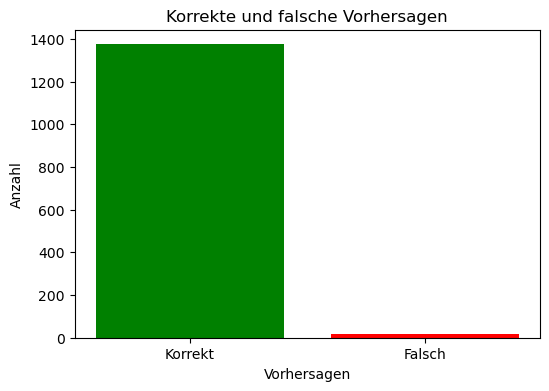

In [17]:
from sklearn.metrics import accuracy_score,classification_report
# Vorhersage auf Testdaten
predictions = model.predict(X_test)

# Evaluierung des Modells
accuracy = accuracy_score(y_test, predictions)
print(f'Genauigkeit: {accuracy:.2f}')

print(classification_report(y_test, predictions))

# Visualisierung der Vorhersagen
correct_predictions = (y_test == predictions).sum()
incorrect_predictions = len(y_test) - correct_predictions

plt.figure(figsize=(6, 4))
plt.bar(['Korrekt', 'Falsch'], [correct_predictions, incorrect_predictions], color=['green', 'red'])
plt.xlabel('Vorhersagen')
plt.ylabel('Anzahl')
plt.title('Korrekte und falsche Vorhersagen')
plt.show()

In [18]:
msg  = np.array(["Go until jurong point, crazy.. Available only ..." ])
msg_transform = cv.transform(msg)
predictions = model.predict(msg_transform.toarray())

In [19]:
print(f"diese Email handelt es sind um eine {predictions[0]} email.") 

diese Email handelt es sind um eine Nicht-Spam email.


In [20]:
msg  = np.array(["Free entry in 2 a wkly comp to win FA Cup fina...." ])
msg_transform = cv.transform(msg)
predictions = model.predict(msg_transform.toarray())

## 6. Save and reload your trained model

You can save and load a model with pickle.

In [21]:
# Saving a model with pickle
import pickle

# Save an existing model to file
pickle.dump(model, open("rs_random_forest_model_wheat_1.pkl", "wb"))

In [22]:
# Load a saved pickle model
loaded_pickle_model = pickle.load(open("rs_random_forest_model_wheat_1.pkl", "rb"))

# Evaluate loaded model
loaded_pickle_model.score(X_test, y_test)

0.9863603732950467

Guten Tag, alle zusammen. Heute werde ich Ihnen einen Code vorstellen, der eine Zusammenfassung einer Spamfilter (Machin Learning) generiert.

1. **Spamfilter**
Zunächst einmal, unser Code nutzt die Python-Bibliothek sklearn, um einen Spamfilter zu erstellen. Dieser Spamfilter verwendet Textvektorisierung und die Naive-Bayes-Klassifikation, um E-Mails als Spam oder Nicht-Spam zu kennzeichnen. Dies ist ein wichtiger Schritt, um unerwünschte E-Mails zu filtern und die Qualität unserer Kommunikation zu verbessern.

2. **Datenanalyse**
Unser Code führt auch einige Datenanalyse-Schritte durch. Er liest eine CSV-Datei, überprüft auf fehlende Werte, erstellt eine Konfusionsmatrix und berechnet die Genauigkeit des Modells. Diese Schritte sind entscheidend, um die Leistung unseres Modells zu bewerten und zu verbessern.

3. **Modellspeicherung und -ladung**
Ein weiterer wichtiger Aspekt unseres Codes ist die Fähigkeit, ein trainiertes Modell zu speichern und zu laden. Wir verwenden die Bibliothek pickle, um unser Modell zu speichern und später wiederzuverwenden. Dies spart uns wertvolle Rechenzeit und Ressourcen, da wir das Modell nicht jedes Mal neu trainieren müssen.

4. **Vorhersagen**
Schließlich macht unser Code einige Vorhersagen mit dem trainierten Modell auf neuen E-Mails und zeigt die Ergebnisse an. Dies ist der endgültige Schritt, bei dem wir die Leistung unseres Modells in der Praxis sehen können.

Zusammenfassend lässt sich sagen, dass unser Code zur Generierung von Seitenzusammenfassungen ein leistungsstarkes Werkzeug ist, das uns hilft, Spam zu filtern, Daten zu analysieren, Modelle zu speichern und zu laden und Vorhersagen zu treffen. Vielen Dank für Ihre Aufmerksamkeit.